In [ ]:
# %pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import HandTrackingModule as htm

In [5]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils


In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [58]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [7]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [50]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [15]:
draw_styled_landmarks(frame, results)

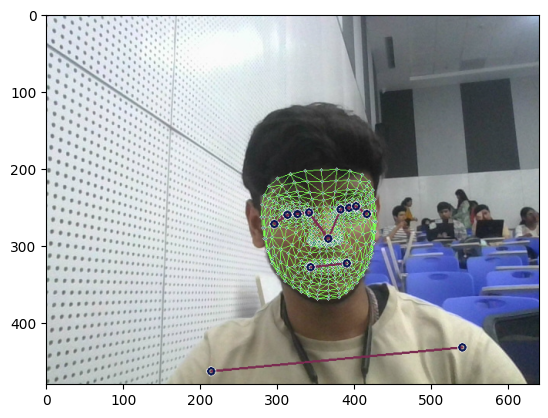

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
len(results.left_hand_landmarks.landmark)

In [17]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [22]:
result_test = extract_keypoints(results)

In [23]:
result_test

array([ 0.57337576,  0.60757351, -0.75033343, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

# Folders


In [9]:
DATA_PATH = os.path.join('Final_LH_MP_Data') 
actions = np.array(['left','mouse','right','volume','presentation'])
no_sequences = 80
sequence_length = 30
start_folder = 1

In [10]:
for action in actions: 
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Data

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

#  Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [12]:
label_map

{'left': 0, 'mouse': 1, 'right': 2, 'volume': 3, 'presentation': 4}

In [18]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
np.array(sequences).shape

(400, 30, 1662)

In [20]:
np.array(labels).shape

(400,)

In [21]:
X = np.array(sequences)

In [22]:
X.shape

(400, 30, 1662)

In [23]:
y = to_categorical(labels).astype(int)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [25]:
y_test.shape

(40, 5)

#  LSTM

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [14]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
12/12 [==============================] - 13s 422ms/step - loss: 2.0424 - categorical_accuracy: 0.1743
Epoch 2/300
12/12 [==============================] - 1s 93ms/step - loss: 2.7588 - categorical_accuracy: 0.1720
Epoch 3/300
12/12 [==============================] - 1s 101ms/step - loss: 1.3719 - categorical_accuracy: 0.3724
Epoch 4/300
12/12 [==============================] - 1s 107ms/step - loss: 0.8576 - categorical_accuracy: 0.5622
Epoch 5/300
12/12 [==============================] - 1s 103ms/step - loss: 0.9218 - categorical_accuracy: 0.5237
Epoch 6/300
12/12 [==============================] - 1s 96ms/step - loss: 2.0355 - categorical_accuracy: 0.3726
Epoch 7/300
12/12 [==============================] - 1s 103ms/step - loss: 1.1466 - categorical_accuracy: 0.5074
Epoch 8/300
12/12 [==============================] - 1s 93ms/step - loss: 0.8966 - categorical_accuracy: 0.5006
Epoch 9/300
12/12 [==============================] - 1s 110ms/step - loss: 0.6937 - categorical_ac

KeyboardInterrupt: 

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 596,741
Trainable params: 596,741
Non-trainable params: 0
__________________________________________________

In [26]:
res = model.predict(X_test)

In [27]:
actions[np.argmax(res[0])]

'presentation'

In [28]:
actions[np.argmax(y_test[0])]

'presentation'

#  Save Weights

In [56]:
model.save('final.h5')

In [15]:
model.load_weights('final.h5')

# Accuracy

In [16]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [29]:
yhat = model.predict(X_test)

In [30]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [31]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[34,  0],
        [ 0,  6]],

       [[28,  1],
        [ 0, 11]],

       [[31,  0],
        [ 0,  9]],

       [[34,  0],
        [ 1,  5]],

       [[32,  0],
        [ 0,  8]]], dtype=int64)

In [32]:
accuracy_score(ytrue, yhat)

0.975

# Final

In [33]:
from scipy import stats

In [34]:
import cv2

In [6]:
import HandTrackingModule as htm
detector=htm.handDetector()
cap=cv2.VideoCapture(0)
while True:
    success,img=cap.read()
    img=detector.findHands(img)
    lmlist=detector.findPosition(img)
    fingers=[]
    if len(lmlist)!=0:
        fingers=detector.fingersUp()
    print(fingers)
    cv2.imshow("feed",img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0, 0, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 1, 0, 0

In [16]:
import pyautogui

In [17]:
from Mouse import VirtualMouse 
import HandTrackingModule as htm
import VolumeControl as volume
from presentation import Presentation
import time as time

In [18]:
detector = htm.handDetector(detectionCon=0.75)
vm=VirtualMouse()
volume_control=volume.VolumeControl()
# present=Presentation()

In [23]:
sequence = []
sentence = []
predictions = []
threshold = 0.2
predicts=True
cap = cv2.VideoCapture(0)
detector = htm.handDetector(detectionCon=0.75)
tipIds = [4, 8, 12, 16, 20]
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        success,image = cap.read()
        
        image, results = mediapipe_detection(image, holistic)
        
        
        img = detector.findHands(image)
        lmList,bbox= detector.findPosition(img, draw=False)
        
        
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        # if predicts:
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            # if res[np.argmax(res)] > threshold: 
            if actions[np.argmax(res)]=='left':
                pyautogui.hotkey('ctrl','winleft','right')
                break
                # predicts=False
                # time.sleep(2)
            elif actions[np.argmax(res)]=='right':
                pyautogui.hotkey('ctrl','winleft','left')
                # predicts=False
                # time.sleep(2)
                break
            elif actions[np.argmax(res)]=='mouse' :
                # pyautogui.hotkey('winleft','down')
                
                # time.sleep(2)
                vm.start()
                vm.run_virtual_mouse()
                vm.end()
                break
            elif actions[np.argmax(res)]=='presentation':
                # pyautogui.hotkey('winleft','down')
                predicts=False
                # time.sleep(2)
                print("presentation")
                break
            
            elif actions[np.argmax(res)]=='volume':
                # vm.start()
                # vm.run_virtual_mouse()
                # vm.end()
                volume_control.start()
                volume_control.run()
                # volume_control.end()
                # predicts=False
                # time.sleep(2)
                break
            predictions.append(np.argmax(res))
        
            

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

mouse


volume_control.start()
                        volume_control.run()
                        volume_control.end()

In [1]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined